In [1]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.ticker as tk
#%matplotlib widget

In [2]:
def Vec (x, y, z):
    return np.array ([[x], [y], [z], [1]]) .astype (float)

In [3]:
def Dot (v, w):
    [vx], [vy], [vz] = v [0:3]
    [wx], [wy], [wz] = w [0:3]
    return vx * wx + vy * wy + vz * wz

In [4]:
def Length (v):
    return np.sqrt (Dot (v, v))

In [5]:
def Angle (v, w):
    return np.acos (Dot (v, w) / Length (v) / Length (w))

In [6]:
def Cross (v, w):
    [vx], [vy], [vz] = v [0:3]
    [wx], [wy], [wz] = w [0:3]
    return Vec (
        vy * wz - vz * wy, 
        vz * wx - vx * wz,
        vx * wy - vy * wx
    )

In [7]:
def Id ():
    return np.array ([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])

In [8]:
def CosSin (phi):
    t = phi * np.pi / 180
    return np.cos (t), np.sin (t)

In [9]:
def RotX (phi):
    c, s = CosSin (phi)
    return np.array ([
        [1, 0,  0, 0],
        [0, c, -s, 0],
        [0, s,  c, 0],
        [0, 0,  0, 1]
    ])

In [10]:
def RotY (phi):
    c, s = CosSin (phi)
    return np.array ([
        [ c, 0, s, 0],
        [ 0, 1, 0, 0],
        [-s, 0, c, 0],
        [0,  0, 0, 1]
    ])

In [11]:
def RotZ (phi):
    c, s = CosSin (phi)
    return np.array ([
        [c, -s, 0, 0],
        [s,  c, 0, 0],
        [0,  0, 1, 0],
        [0,  0, 0, 1]
    ])

In [12]:
def KugelKoord (v):
    [x], [y], [z] = v [0:3]
    xy = np.sqrt (x ** 2 + y ** 2)
    alpha = np.atan2 (z, xy) * 180 / np.pi
    beta  = np.atan2 (y, x) * 180 / np.pi
    r = np.sqrt (x ** 2 + y ** 2 + z ** 2)
    return r, alpha, beta 

In [13]:
def Plot (ax, col, *pnts):
    tab = np.hstack (*pnts)
    pl.plot (tab [0], tab [1], tab [2], color = col)

In [14]:
def Arrow (ax, vec, col):

    headlength = 1
    thickness = 1

    r, alpha, beta = KugelKoord (vec)
    t = RotZ (beta) @ RotY (-alpha)
    
    u = thickness / 2
    v = r - headlength
    a = t @ Vec (0, -u, -u)
    b = t @ Vec (0,  u, -u)
    c = t @ Vec (0,  u,  u)
    d = t @ Vec (0, -u,  u)
    e = t @ Vec (v, -u, -u)
    f = t @ Vec (v,  u, -u)
    g = t @ Vec (v,  u,  u)
    h = t @ Vec (v, -u,  u)
    i = t @ Vec (r,  0,  0)

    Plot (ax, col, (a, b, c, d, a))
    Plot (ax, col, (e, f, g, h, e))
    Plot (ax, col, (a, e, i))
    Plot (ax, col, (b, f, i))
    Plot (ax, col, (c, g, i))
    Plot (ax, col, (d, h, i))

In [15]:
u = Vec (-3, 2, -1)
v = Vec (4, 1, 1)
w = Cross (u, v)

print ('u * w =', Dot (u, w))
print ('v * w =', Dot (v, w))

phi = Angle (u, v)
print ('phi =', phi * 180 / np.pi)

print ('|u| =', Length (u))
print ('|v| =', Length (v))
print ('|w| =', Length (w))

print (Length (u) * Length (v) * np.sin (phi))

u * w = 0.0
v * w = 0.0
phi = 133.86288040686745
|u| = 3.7416573867739413
|v| = 4.242640687119285
|w| = 11.445523142259598
11.445523142259592


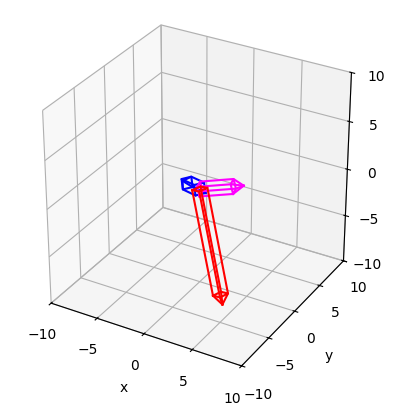

In [16]:
ax = pl.figure() .add_subplot (projection = '3d')
ax.set_xlim (-10, 10); ax.set_xlabel ('x'); ax.xaxis.set_major_locator (tk.MultipleLocator (5))
ax.set_ylim (-10, 10); ax.set_ylabel ('y'); ax.yaxis.set_major_locator (tk.MultipleLocator (5))
ax.set_zlim (-10, 10); ax.set_zlabel ('z'); ax.zaxis.set_major_locator (tk.MultipleLocator (5))
ax.set_aspect ('equal')

r1, alpha1, beta1 = KugelKoord (u)
r2, alpha2, beta2 = KugelKoord (v)
r3, alpha3, beta3 = KugelKoord (w)
Arrow (ax, u, 'blue')
Arrow (ax, v, 'magenta')
Arrow (ax, w, 'red')